# COVID cases prediction for 11th - 17th May

## Import data 

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 831120 entries, 0 to 831119
Data columns (total 9 columns):
Id                831120 non-null int64
County            754320 non-null object
Province_State    786240 non-null object
Country_Region    831120 non-null object
Population        831120 non-null int64
Weight            831120 non-null float64
Date              831120 non-null object
Target            831120 non-null object
TargetValue       831120 non-null float64
dtypes: float64(2), int64(2), object(5)
memory usage: 57.1+ MB


In [4]:
df.describe(include = 'all')

,Id,County,Province_State,Country_Region,Population,Weight,Date,Target,TargetValue
count,831120.000000,754320,786240,831120,8.311200e+05,831120.000000,831120,831120,831120.000000
unique,NaN,1840,133,187,NaN,NaN,120,2,NaN
top,NaN,Washington,Texas,US,NaN,NaN,2020-03-25,ConfirmedCases,NaN
freq,NaN,7440,61200,767520,NaN,NaN,6926,415560,NaN
mean,484800.500000,NaN,NaN,NaN,2.720127e+06,0.530870,NaN,NaN,10.763795
std,279911.122806,NaN,NaN,NaN,3.477771e+07,0.451909,NaN,NaN,273.119587
min,1.000000,NaN,NaN,NaN,8.600000e+01,0.047491,NaN,NaN,-10034.000000
25%,242380.750000,NaN,NaN,NaN,1.213300e+04,0.096838,NaN,NaN,0.000000
50%,484800.500000,NaN,NaN,NaN,3.053100e+04,0.349413,NaN,NaN,0.000000
75%,727220.250000,NaN,NaN,NaN,1.056120e+05,0.968379,NaN,NaN,0.000000


### Deal with abnormal values

In [5]:
negative = df[df['TargetValue'] < 0][['Country_Region', 'Date', 'Target', 
                                      'TargetValue']].groupby(['Country_Region', 'Date', 'Target']).sum().reset_index()

In [6]:
negative.sort_values(by = 'Date').head(5)

,Country_Region,Date,Target,TargetValue
0,Australia,2020-01-31,ConfirmedCases,-1.0
1,Australia,2020-02-02,ConfirmedCases,-1.0
2,Australia,2020-03-06,ConfirmedCases,-1.0
26,France,2020-03-09,ConfirmedCases,-2.0
58,US,2020-03-11,ConfirmedCases,-1.0


In [7]:
negative['Country_Region'].value_counts()

US                136
France             10
Canada              9
Australia           8
United Kingdom      4
Ecuador             3
Kazakhstan          2
Uganda              2
Iceland             2
New Zealand         2
Spain               1
Mauritius           1
Finland             1
Venezuela           1
Cyprus              1
Nepal               1
Slovakia            1
Japan               1
Benin               1
Lithuania           1
Portugal            1
Madagascar          1
Zimbabwe            1
Luxembourg          1
Philippines         1
Serbia              1
Czechia             1
China               1
San Marino          1
India               1
Guyana              1
Denmark             1
Honduras            1
Uruguay             1
Germany             1
Name: Country_Region, dtype: int64

### Negative TargetValue mainly appered in US and according to the real world data, it should be positive

In [8]:
df['TargetValue'] = df['TargetValue'].apply(lambda x:abs(x))

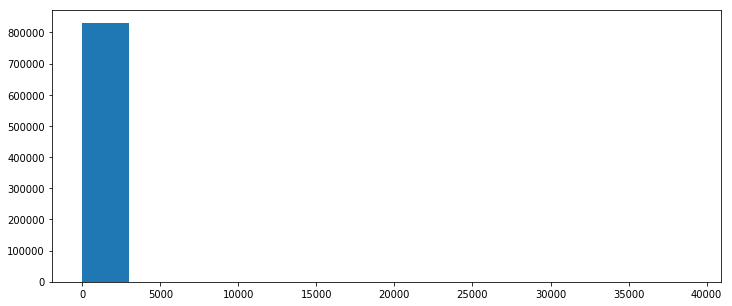

In [9]:
#plot the target value
binsize = 3000
bins = np.arange(0, df['TargetValue'].max()+binsize, binsize)

plt.figure(figsize=[12, 5])
plt.hist(data = df, x = 'TargetValue', bins = bins)
plt.show()

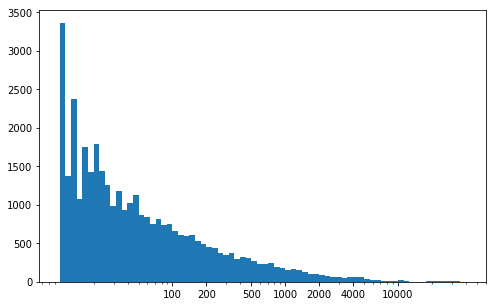

In [10]:
# transfer to a log scale figure

log_binsize = 0.05
bins = 10 ** np.arange(1, np.log10(df['TargetValue'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'TargetValue', bins = bins)
plt.xscale('log')
plt.xticks([100, 200, 500, 1e3, 2e3, 4e3, 1e4], [100, 200, 500, 1000, 2000, 4000, 10000])
#plt.xlabel('Open Revolving Monthly Payment($)')
plt.show()

### Pull out the trend of confirmed cases and fatal cases in top-10 countries

In [11]:
df_1 = df[df.Province_State.isnull()].groupby('Country_Region').sum().reset_index().sort_values(by = 'TargetValue', ascending = False)
top_10 = list(df_1.iloc[:10]['Country_Region'].unique())
print (top_10)

['US', 'Brazil', 'Russia', 'United Kingdom', 'Spain', 'Italy', 'France', 'Germany', 'Turkey', 'Iran']


In [12]:
df_1.iloc[:10]

,Country_Region,Id,Population,Weight,TargetValue
173,US,231129720,77793957360,67.358312,1671670.0
23,Brazil,2112120,49472614320,68.950941,330134.0
139,Russia,14006520,35183803920,70.200769,320653.0
177,United Kingdom,232070520,15626400000,73.367618,288000.0
157,Spain,15216120,11145221280,74.772124,281045.0
85,Italy,10108920,14559732240,73.657070,260492.0
62,France,8563320,16010400000,73.268753,218057.0
66,Germany,8832120,19625016000,72.450118,187286.0
172,Turkey,16224120,18897852720,72.600571,157797.0
81,Iran,9840120,19048776000,72.568822,136590.0


In [13]:
df_3 = df[df['Country_Region'].isin(top_10)]
df_4 = pd.pivot_table(df_3, index = ['Date', 'Target'], columns = 'Country_Region', values = 'TargetValue').reset_index()
df_4.head(5)

Country_Region,Date,Target,Brazil,France,Germany,Iran,Italy,Russia,Spain,Turkey,US,United Kingdom
0,2020-01-23,ConfirmedCases,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,2020-01-23,Fatalities,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,2020-01-24,ConfirmedCases,0.0,0.181818,0.0,0.0,0.0,0.0,0.0,0.0,0.000313,0.0
3,2020-01-24,Fatalities,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,2020-01-25,ConfirmedCases,0.0,0.090909,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


Text(0, 0.5, 'Confirmed cases')

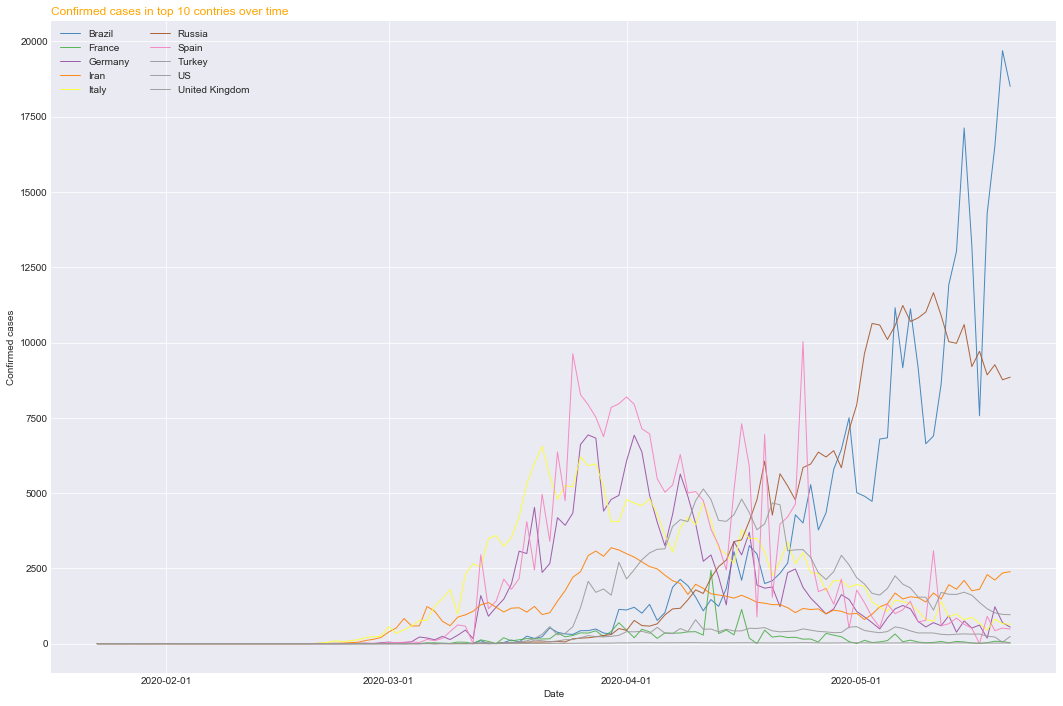

In [14]:
#confirm cases
confirm = df_4[df_4['Target'] == 'ConfirmedCases'].sort_values(by = 'Date')

# style
plt.figure(figsize = [18, 12])
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('Set1')
 
# multiple line plot
num=0
for column in confirm.drop(['Date', 'Target'], axis=1):
    num+=1
    plt.plot(confirm['Date'], confirm[column], marker='', color=palette(num), linewidth=1, alpha=0.9, label=column)
 
# Add legend
plt.legend(loc=2, ncol=2)
 
# Add titles
plt.title("Confirmed cases in top 10 contries over time", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("Date")
plt.xticks(['2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01'], ['2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01'])
plt.ylabel("Confirmed cases")


Text(0, 0.5, 'Fatal cases')

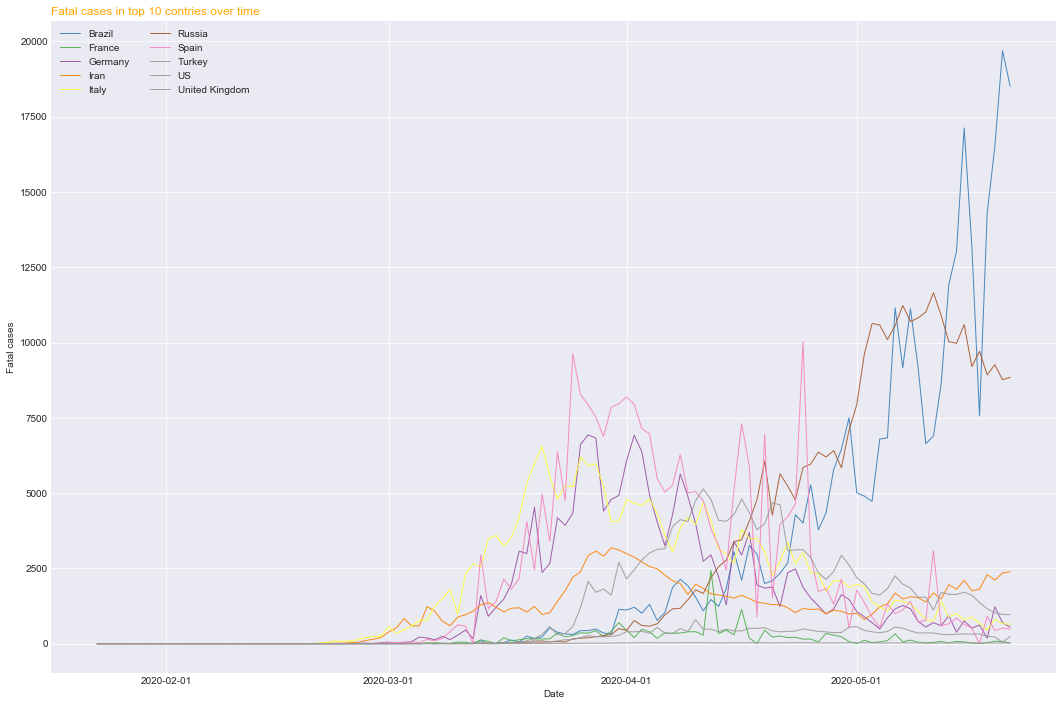

In [15]:
#confirm cases
fatal = df_4[df_4['Target'] == 'Fatalities'].sort_values(by = 'Date')

# style
plt.figure(figsize = [18, 12])
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('Set1')
 
# multiple line plot
num=0
for column in fatal.drop(['Date', 'Target'], axis=1):
    num+=1
    plt.plot(fatal['Date'], confirm[column], marker='', color=palette(num), linewidth=1, alpha=0.9, label=column)
 
# Add legend
plt.legend(loc=2, ncol=2)
 
# Add titles
plt.title("Fatal cases in top 10 contries over time", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("Date")
plt.xticks(['2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01'], ['2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01'])
plt.ylabel("Fatal cases")

## Split data into train (before 11th May) and test (11th-17th May)

### Preprocessing data

In [16]:
total = df.copy()

In [17]:
train = total[total['Date'] <= '2020-05-10']
test = total[(total['Date'] >= '2020-05-11') & (total['Date'] <= '2020-05-17')]

ID=train['Id']
FID=test['Id']

In [18]:
from sklearn.preprocessing import LabelEncoder

da= pd.to_datetime(train['Date'], errors='coerce')
train['Date']= da.dt.strftime("%Y%m%d").astype(int)

train=train.drop(columns=['County','Province_State','Id'])

l = LabelEncoder()
X = train.iloc[:,0].values
train.iloc[:,0] = l.fit_transform(X.astype(str))

X = train.iloc[:,4].values
train.iloc[:,4] = l.fit_transform(X)

In [19]:
train.head(5)

,Country_Region,Population,Weight,Date,Target,TargetValue
0,0,27657145,0.058359,20200123,0,0.0
1,0,27657145,0.583587,20200123,1,0.0
2,0,27657145,0.058359,20200124,0,0.0
3,0,27657145,0.583587,20200124,1,0.0
4,0,27657145,0.058359,20200125,0,0.0


In [20]:
da= pd.to_datetime(test['Date'], errors='coerce')
test['Date']= da.dt.strftime("%Y%m%d").astype(int)

test=test.drop(columns=['County','Province_State','Id'])

l = LabelEncoder()
X = test.iloc[:,0].values
test.iloc[:,0] = l.fit_transform(X.astype(str))

X = test.iloc[:,4].values
test.iloc[:,4] = l.fit_transform(X)

In [21]:
test.head(5)

,Country_Region,Population,Weight,Date,Target,TargetValue
218,0,27657145,0.058359,20200511,0,285.0
219,0,27657145,0.583587,20200511,1,2.0
220,0,27657145,0.058359,20200512,0,276.0
221,0,27657145,0.583587,20200512,1,5.0
222,0,27657145,0.058359,20200513,0,263.0


In [22]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48482 entries, 218 to 831111
Data columns (total 6 columns):
Country_Region    48482 non-null int64
Population        48482 non-null int64
Weight            48482 non-null float64
Date              48482 non-null int64
Target            48482 non-null int64
TargetValue       48482 non-null float64
dtypes: float64(2), int64(4)
memory usage: 2.6 MB


### Build Random Forest model to predict

In [23]:
y_train=train['TargetValue']
x_train=train.drop(['TargetValue'],axis=1)

y_test=test['TargetValue']
x_test=test.drop(['TargetValue'],axis=1)

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pip = Pipeline([('scaler2' , StandardScaler()), ('RandomForestRegressor: ', RandomForestRegressor())])
pip.fit(x_train, y_train)
prediction = pip.predict(x_test)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [25]:
prediction

array([3.134e+02, 5.300e+00, 3.134e+02, ..., 3.000e-01, 2.300e+00,
       3.000e-01])

In [26]:
#accuracy score

acc=pip.score(x_test,y_test)
acc

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0.9516021648073368

In [27]:
output=pd.DataFrame({'Id':FID,'TargetValue':prediction})
output.head(5)

,Id,TargetValue
218,219,313.4
219,220,5.3
220,221,313.4
221,222,5.3
222,223,313.4


In [28]:
test_1 = df[(df['Date'] >= '2020-05-11') & (df['Date'] <= '2020-05-17')][['Id', 'Country_Region','Date','Target']]

In [29]:
output_1 = pd.merge(test_1, output, how = 'left', on = ['Id', 'Id'])

In [30]:
output_1.head(5)

,Id,Country_Region,Date,Target,TargetValue
0,219,Afghanistan,2020-05-11,ConfirmedCases,313.4
1,220,Afghanistan,2020-05-11,Fatalities,5.3
2,221,Afghanistan,2020-05-12,ConfirmedCases,313.4
3,222,Afghanistan,2020-05-12,Fatalities,5.3
4,223,Afghanistan,2020-05-13,ConfirmedCases,313.4


In [31]:
output_1.to_csv('prediction.csv')